In [ ]:
!pip install langchain
!pip install langchain_experimental

!pip install --upgrade openai==0.28.1
!pip install tabulate
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.3/803.3 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.1.0
    Uninstalling langchain-0.1.0:
      Successfully uninstalled langchain-0.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "OpenAI_Key"

In [ ]:
from langchain.llms import OpenAI

from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


from langchain.agents import (
    AgentType, #ZERO_SHOT_REACT_DESCRIPTION default value
)

In [ ]:
import pandas as pd

In [ ]:
#If you want to use your own CSV just execute this Cell
from google.colab import files

def load_csv_file():
  """Loads a CSV file into a Pandas dataframe."""

  uploaded_file = files.upload()
  file_path = next(iter(uploaded_file))
  document = pd.read_csv(file_path)
  return document

if __name__ == "__main__":
  document = load_csv_file()
  print(document)

Saving Features data set.csv to Features data set.csv
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unempl

In [ ]:
document1 = document.head(500)

In [ ]:
litte_ds = create_pandas_dataframe_agent(
    OpenAI(temperature=0), document1, verbose=True
)

In [ ]:
import time
import openai
try:
    # Your code to make an API call
    litte_ds.run("Analyze this data, and tell me if you see any trends. give me a conclusion with the principal trend")
    # e.g., response = openai.Completion.create(....)
except openai.error.RateLimitError as e:
    wait = int(e.headers.get('Retry-After', 60))  # Get retry time, default to 60 seconds
    print(f"Rate limit exceeded. Retrying after {wait} seconds.")
    time.sleep(wait)





> Entering new AgentExecutor chain...
Thought: I should look at the data and see if there are any patterns or trends that stand out.
Action: python_repl_ast
Action Input: df.describe()
Observation:             Store  Temperature  Fuel_Price     MarkDown1     MarkDown2  \
count  500.000000   500.000000  500.000000    224.000000    185.000000   
mean     1.908000    68.035800    3.242718   8251.250670   3551.385189   
std      0.792965    14.378371    0.402980   9339.067299  10191.509018   
min      1.000000    33.020000    2.514000     41.740000      0.240000   
25%      1.000000    56.327500    2.826000   3290.152500     61.030000   
50%      2.000000    69.050000    3.314000   6170.165000    295.050000   
75%      3.000000    81.150000    3.571000   9935.490000   2144.700000   
max      3.000000    93.340000    3.907000  75149.790000  92523.940000   

           MarkDown3     MarkDown4     MarkDown5         CPI  Unemployment  
count     215.000000    222.000000    224.000000  474.00

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


 I see that there are some missing values in the markdown columns, and the standard deviation for those columns is quite high compared to the other columns.
Action: python_repl_ast
Action Input: df.corr()
Observation:                  Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000     0.113720   -0.056580  -0.157006  -0.053589   
Temperature   0.113720     1.000000    0.188434  -0.088626  -0.408990   
Fuel_Price   -0.056580     0.188434    1.000000   0.059359  -0.309777   
MarkDown1    -0.157006    -0.088626    0.059359   1.000000   0.029734   
MarkDown2    -0.053589    -0.408990   -0.309777   0.029734   1.000000   
MarkDown3    -0.007567    -0.080079   -0.174152  -0.113862  -0.057246   
MarkDown4    -0.123322     0.009121   -0.002134   0.796402  -0.051840   
MarkDown5    -0.185904    -0.092573   -0.124654   0.213632  -0.009073   
CPI           0.135888    -0.029918    0.669625  -0.105349  -0.161469   
Unemployment -0.137343     0.068176   -0.434678  -0.



> Entering new AgentExecutor chain...
Thought: I need to clean the data and remove any null values before using it in a machine learning model. Then, I need to decide which model is best for forecasting unemployment.
Action: python_repl_ast
Action Input: df.dropna()
Observation:      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
92       1  11/11/2011        59.11       3.297   10382.90    6115.67   
93       1  18/11/2011        62.25       3.308    6074.12     254.39   
94       1  25/11/2011        60.14       3.236     410.31      98.00   
95       1  02/12/2011        48.91       3.172    5629.51      68.00   
96       1  09/12/2011        43.93       3.158    4640.65      19.00   
..     ...         ...          ...         ...        ...        ...   
493      3  27/07/2012        84.94       3.407    3447.28      31.00   
494      3  03/08/2012        86.55       3.417    5683.49      37.20   
495      3  10/08/2012        85.85       3.494    3375.44   

 I can use a line plot to visualize the unemployment values over time.
Action: python_repl_ast
Action Input: df['Unemployment'].plot()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:Rate limit exceeded. Retrying after 60 seconds.


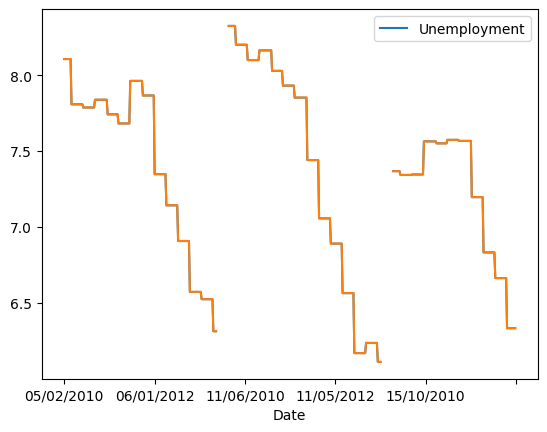

In [ ]:
try:
    # Your code to make an API call
    litte_ds.run("First clean the data, no null values and prepare to use it in a Machine Leaninrg Model. \
Then decide which model is better to forecast the unemployment \
Tell me the decision and use this kind of model to forecast the unemployment \
create a line plot with unempoyment values forecasted. Limit the rate of API calls to openAI within limit")
    # e.g., response = openai.Completion.create(....)
except openai.error.RateLimitError as e:
    wait = int(e.headers.get('Retry-After', 60))  # Get retry time, default to 60 seconds
    print(f"Rate limit exceeded. Retrying after {wait} seconds.")
    time.sleep(wait)
